<a href="https://colab.research.google.com/github/Yamini-K1810/Arecanut-Disease-Detection-using-CNN/blob/main/ArecanutLeaves_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip uninstall tensorflow tensorflow-gpu keras tensorboard tf-keras -y

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0
Found existing installation: tensorboard 2.18.0
Uninstalling tensorboard-2.18.0:
  Successfully uninstalled tensorboard-2.18.0
Found existing installation: tf_keras 2.18.0
Uninstalling tf_keras-2.18.0:
  Successfully uninstalled tf_keras-2.18.0


In [ ]:
!pip uninstall protobuf -y

Found existing installation: protobuf 4.25.6
Uninstalling protobuf-4.25.6:
  Successfully uninstalled protobuf-4.25.6


In [ ]:
!pip install protobuf==3.20.*

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 10.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-hub 0.16.1 requires tf-keras>=2.14.1, which is not installed.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.


In [ ]:
!pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 98.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires tf-keras>=2.18.0, which is not installed.


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import image
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.18.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip /content/ArecanutLeaf.zip

Mounted at /content/drive
Archive:  /content/ArecanutLeaf.zip
   creating: ArecanutLeaf/
   creating: ArecanutLeaf/Healthy_Leaf/
  inflating: ArecanutLeaf/Healthy_Leaf/Healthy_leaf (1) - Copy.jpeg  
  inflating: ArecanutLeaf/Healthy_Leaf/Healthy_leaf (1) - Copy.jpg  
  inflating: ArecanutLeaf/Healthy_Leaf/Healthy_leaf (1).jpeg  
  inflating: ArecanutLeaf/Healthy_Leaf/Healthy_leaf (1).jpg  
  inflating: ArecanutLeaf/Healthy_Leaf/Healthy_leaf (10).jpg  
  inflating: ArecanutLeaf/Healthy_Leaf/Healthy_leaf (11).jpg  
  inflating: ArecanutLeaf/Healthy_Leaf/Healthy_leaf (12).jpg  
  inflating: ArecanutLeaf/Healthy_Leaf/Healthy_leaf (13).jpg  
  inflating: ArecanutLeaf/Healthy_Leaf/Healthy_leaf (14).jpg  
  inflating: ArecanutLeaf/Healthy_Leaf/Healthy_leaf (2) - Copy.jpeg  
  inflating: ArecanutLeaf/Healthy_Leaf/Healthy_leaf (2) - Copy.jpg  
  inflating: ArecanutLeaf/Healthy_Leaf/Healthy_leaf (2).jpeg  
  inflating: ArecanutLeaf/Healthy_Leaf/Healthy_leaf (2).jpg  
  inflating: ArecanutLeaf/He

In [ ]:
img_width = 64
img_height = 64

In [ ]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2) #rescale makes it grey scale, #dataset is split, 80% for training and 20% for validation, rescale is for normalization

In [ ]:
train_data_generator = datagen.flow_from_directory(directory='/content/ArecanutLeaf',
                                                   target_size = (img_width, img_height), # image size
                                                   class_mode = 'binary', # used for binary classification (pos or neg)
                                                   batch_size = 16, # (16 imgs in 1 batch)
                                                   subset = 'training' # used for training
                                                  )

Found 37 images belonging to 2 classes.


In [ ]:
validation_data_generator = datagen.flow_from_directory(directory='/content/ArecanutLeaf',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'  # validate the training model
                                                  )

Found 9 images belonging to 2 classes.


In [ ]:
# Defining CNN Model
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406,625 (1.55 MB)

 Trainable params: 406,625 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Training is done here
# Training is done here
history = model.fit(train_data_generator,
                    steps_per_epoch=len(train_data_generator),
                    epochs=35,  # number of times to be trained
                    validation_data=validation_data_generator,
                    validation_steps=len(validation_data_generator))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 746ms/step - accuracy: 0.4742 - loss: 0.8059 - val_accuracy: 0.5556 - val_loss: 0.6874
Epoch 2/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - accuracy: 0.5710 - loss: 0.6597 - val_accuracy: 0.5556 - val_loss: 0.6616
Epoch 3/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - accuracy: 0.6255 - loss: 0.6203 - val_accuracy: 0.6667 - val_loss: 0.6764
Epoch 4/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.6738 - loss: 0.6438 - val_accuracy: 0.5556 - val_loss: 0.6756
Epoch 5/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step - accuracy: 0.7855 - loss: 0.6263 - val_accuracy: 0.7778 - val_loss: 0.6559
Epoch 6/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step - accuracy: 0.7789 - loss: 0.5842 - val_accuracy: 0.6667 - val_loss: 0.6374
Epoch 7/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 608ms/step - accuracy: 0.7513 - loss: 0.5746 - val_accuracy: 0.6667 - val_loss: 0.6338
Epoch 8/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 374ms/step - accuracy: 0.6918 - loss: 0.5153 - val_accuracy: 0.6667 - val_loss:

In [ ]:
model.save('arecanut_leaf_vgg19.h5')

In [ ]:
history.history

{'accuracy': [0.4864864945411682,
  0.5675675868988037,
  0.6216216087341309,
  0.6756756901741028,
  0.7837837934494019,
  0.7297297120094299,
  0.6216216087341309,
  0.7027027010917664,
  0.7567567825317383,
  0.8108108043670654,
  0.8918918967247009,
  0.8648648858070374,
  0.8918918967247009,
  0.837837815284729,
  0.9189189076423645,
  0.8108108043670654,
  0.8108108043670654,
  0.8648648858070374,
  0.8918918967247009,
  0.9459459185600281,
  0.9459459185600281,
  0.9459459185600281,
  0.9729729890823364,
  0.9189189076423645,
  0.9729729890823364,
  0.9729729890823364,
  0.9729729890823364,
  0.9459459185600281,
  0.9729729890823364,
  0.9189189076423645,
  1.0,
  0.9459459185600281,
  1.0,
  0.9729729890823364,
  0.9729729890823364],
 'loss': [0.8947134017944336,
  0.6759454607963562,
  0.6404483914375305,
  0.6416428089141846,
  0.6142133474349976,
  0.6015676259994507,
  0.5890898704528809,
  0.5361120700836182,
  0.5304823517799377,
  0.4317112863063812,
  0.4158951640129089

In [ ]:
#predict = model.predict_generator(validation_data_generator, steps=len(validation_data_generator)) # defining probablity, if prob>0.5=>infected else healthy
predict = model.predict(validation_data_generator, steps=len(validation_data_generator))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


In [ ]:
for i in predict:
  print(i)

[0.03478579]
[0.91188365]
[0.94576716]
[0.03478579]
[0.19188009]
[0.04135652]
[0.04287594]
[0.04287594]
[0.8988758]


In [ ]:
rounded_predict = np.rint(predict)
print(rounded_predict)

[[0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [ ]:
# For confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[3 2]
 [3 1]]


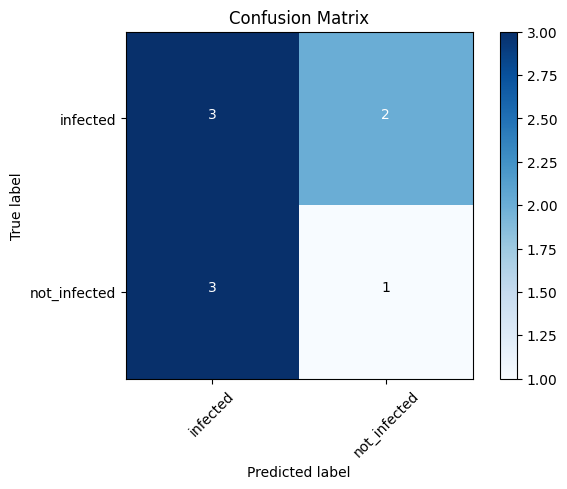

In [ ]:
cm = confusion_matrix(y_true=validation_data_generator.labels, y_pred=rounded_predict)
cm_plot_labels = ['infected','not_infected']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()


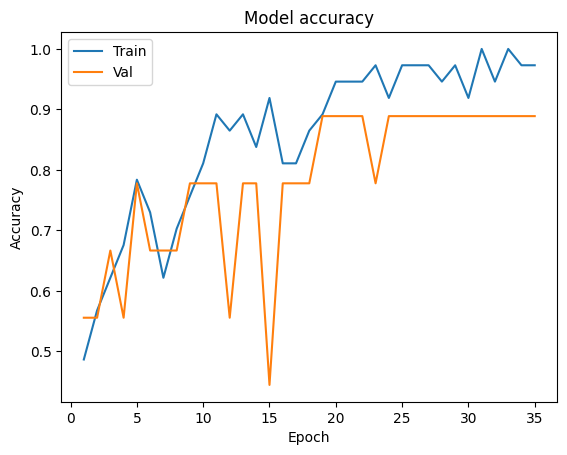

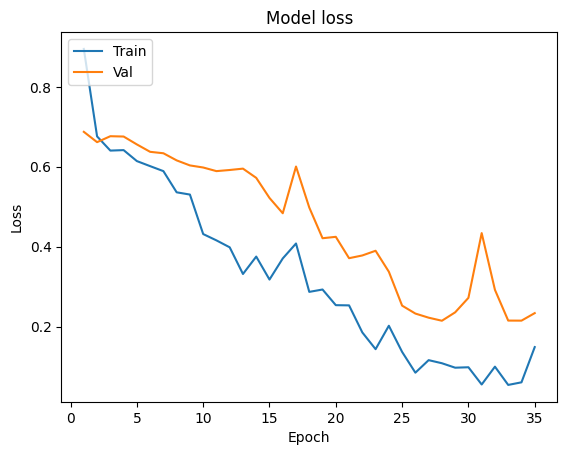

In [ ]:
plot_learningCurve(history, 35)

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_true=validation_data_generator.labels, y_pred=rounded_predict)


0.3333333333333333

In [ ]:
recall_score(y_true=validation_data_generator.labels, y_pred=rounded_predict)


0.25

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true=validation_data_generator.labels, y_pred=rounded_predict)

0.2857142857142857

In [ ]:
model = load_model('arecanut_leaf_vgg19.h5')

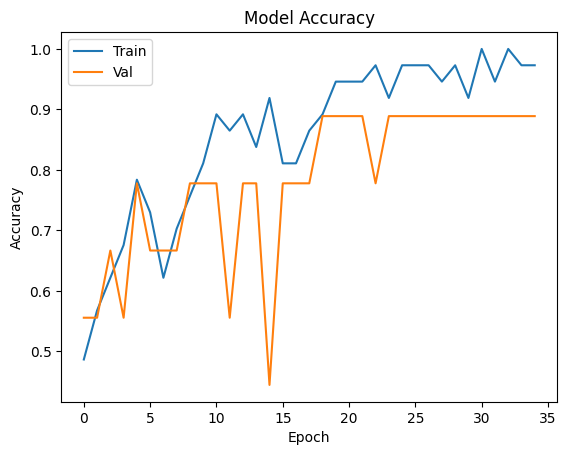

In [ ]:
#Visualize model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

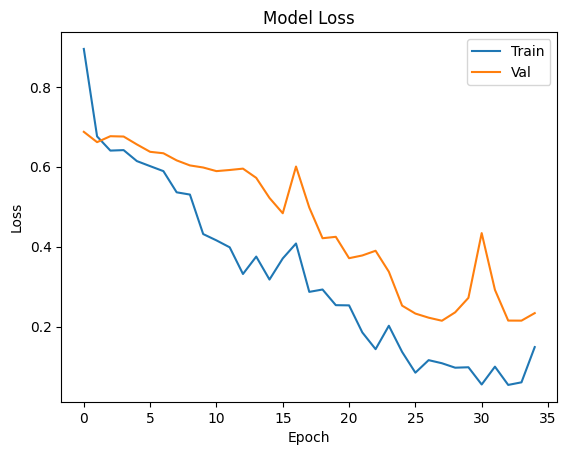

In [ ]:
#Visualize model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [ ]:
# used for testing
image = load_img('/content/ArecanutLeaf/Healthy_Leaf/Healthy_leaf (12).jpg', target_size=(64, 64))
image = img_to_array(image) / 255.0
image = np.expand_dims(image, axis=0)

# Predict
prediction = model.predict(image)
print("Infected" if prediction > 0.5 else "Healthy")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Healthy


In [ ]:
image = load_img('/content/ArecanutLeaf/yellow_leaf spot_disease/yellow_leaf_spot (2).jpeg', target_size=(64, 64))
image = img_to_array(image) / 255.0
image = np.expand_dims(image, axis=0)

# Predict
prediction = model.predict(image)
print("Infected" if prediction > 0.5 else "Healthy")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Infected
